# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [8]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import re 
%matplotlib inline

In [9]:
pwd

'C:\\Users\\hamza\\OneDrive\\Desktop'

In [10]:
# Read your api key environment variable
# YOUR CODE HERE!
from newsapi import NewsApiClient
#newsapi = NewsApiClient(api_key=os.getenv('news'))
#print(newsapi)
newsapi = NewsApiClient(api_key='80374fb33e734025b70b7e07c96485b2')

In [11]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]
#sources = newsapi.get_sources()


Total articles about Bitcoin: 3517


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
 'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
 'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
 'publishedAt': '2020-09-10T14:28:00Z',
 'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'}

In [12]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][0]

Total articles about Ethereum: 1363


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [13]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.6908,0.000,0.160,0.840,Two alleged crypto traders in Singapore appare...
1,-0.5267,0.000,0.128,0.872,A US district judge has sentenced a UK Nationa...
2,0.0000,0.000,0.000,1.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
3,0.2732,0.063,0.000,0.937,“The COVID-19 pandemic has resulted in a mass ...
4,0.0000,0.000,0.000,1.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [14]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.7506,0.209,0.0,0.791,If you've interacted with cryptocurrencies in ...
1,0.0000,0.000,0.0,1.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,0.000,0.0,1.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,0.181,0.0,0.819,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,0.000,0.0,1.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [15]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.319865,0.07155,0.014400,0.914050
std,0.376131,0.04925,0.044625,0.047411
min,-0.690800,0.00000,0.000000,0.802000
25%,0.204900,0.04725,0.000000,0.910000
50%,0.507000,0.09000,0.000000,0.910000
75%,0.507000,0.09000,0.000000,0.910000
max,0.750600,0.19800,0.160000,1.000000


In [16]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,16.000000,16.000000,16.000000,16.000000
mean,0.244888,0.072625,0.011062,0.916375
std,0.287926,0.077534,0.031231,0.090504
min,0.000000,0.000000,0.000000,0.747000
25%,0.000000,0.000000,0.000000,0.835500
50%,0.113150,0.069000,0.000000,0.931000
75%,0.428175,0.118250,0.000000,1.000000
max,0.757900,0.209000,0.110000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: bitcoin

Q: Which coin had the highest compound score?

A: bitcoin

Q. Which coin had the highest positive score?

A: bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [20]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
Bitcoin_df["tokens"] = Bitcoin_df.Text.apply(tokenizer)
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.6908,0.000,0.160,0.840,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,-0.5267,0.000,0.128,0.872,A US district judge has sentenced a UK Nationa...,"[us, district, judge, ha, sentenced, uk, natio..."
2,0.0000,0.000,0.000,1.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
3,0.2732,0.063,0.000,0.937,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, ha, resulted, mass, shift, w..."
4,0.0000,0.000,0.000,1.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagoslondon, reuters, four, month, ago, abola..."


In [21]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
Ethereum_df["tokens"] = Ethereum_df.Text.apply(tokenizer)
Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.7506,0.209,0.0,0.791,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,0.0000,0.000,0.0,1.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tldr, complete, stock, cryptocurrency, invest..."
2,0.0000,0.000,0.0,1.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, readopinions, expressed, entr..."
3,0.7579,0.181,0.0,0.819,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
4,0.0000,0.000,0.0,1.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_p = tokenizer(Bitcoin_df.Text.str.cat())
bitcoin_p
ethereum_p= tokenizer(Ethereum_df.Text.str.cat())
ethereum_p
N=2
bigram_counts_B = Counter(ngrams(bitcoin_p, N))
print(dict(bigram_counts_B))

{('two', 'alleged'): 1, ('alleged', 'crypto'): 1, ('crypto', 'trader'): 1, ('trader', 'singapore'): 1, ('singapore', 'apparently'): 1, ('apparently', 'came'): 1, ('came', 'foolproof'): 1, ('foolproof', 'plan'): 1, ('plan', 'rather'): 1, ('rather', 'convert'): 1, ('convert', 'customer'): 1, ('customer', 'singapore'): 1, ('singapore', 'dollar'): 1, ('dollar', 'bitcoin'): 1, ('bitcoin', 'would'): 1, ('would', 'simply'): 1, ('simply', 'rob'): 1, ('rob', 'victim'): 1, ('victim', 'came'): 1, ('came', 'charsa'): 1, ('charsa', 'us'): 1, ('us', 'district'): 1, ('district', 'judge'): 1, ('judge', 'ha'): 1, ('ha', 'sentenced'): 1, ('sentenced', 'uk'): 1, ('uk', 'national'): 1, ('national', 'five'): 1, ('five', 'year'): 1, ('year', 'federal'): 1, ('federal', 'prison'): 1, ('prison', 'participating'): 1, ('participating', 'cybercrime'): 1, ('cybercrime', 'activity'): 1, ('activity', 'hacking'): 1, ('hacking', 'collective'): 1, ('collective', 'group'): 1, ('group', 'dark'): 1, ('dark', 'overlord'): 

In [24]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N= 2
bigram_counts_E = Counter(ngrams(ethereum_p, N))
print(dict(bigram_counts_E))

{('youve', 'interacted'): 1, ('interacted', 'cryptocurrencies'): 1, ('cryptocurrencies', 'past'): 1, ('past', 'couple'): 1, ('couple', 'year'): 1, ('year', 'good'): 1, ('good', 'chance'): 1, ('chance', 'youve'): 1, ('youve', 'used'): 1, ('used', 'metamask'): 1, ('metamask', 'cryptocurrency'): 1, ('cryptocurrency', 'wallet'): 1, ('wallet', 'form'): 1, ('form', 'browser'): 1, ('browser', 'extension'): 1, ('extension', 'support'): 1, ('support', 'ether'): 1, ('ether', 'charstldr'): 1, ('charstldr', 'complete'): 1, ('complete', 'stock'): 1, ('stock', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'toolkit'): 1, ('toolkit', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'sept'): 1, ('sept', 'saving'): 1, ('saving', 'list'): 1, ('list', 'pricethe'): 1, ('pricethe', 'world'): 1, ('world', 'finance'): 1, ('finance', 'ha'): 1, ('ha', 'always'): 1, ('always', 'complicated'): 1, ('complicated', 'th'): 1, ('th', 'charsseptember'): 1, ('charsseptember', 'min'): 2, ('min', 

In [25]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_10= token_count(bitcoin_p, 10)
bitcoin_10

[('bitcoin', 40),
 ('satoshi', 26),
 ('nakaboto', 26),
 ('charsour', 13),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13),
 ('fucking', 13),
 ('daywelcome', 13)]

In [27]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_10= token_count(ethereum_p,10)
ethereum_10

[('bitcoin', 7),
 ('cryptocurrency', 6),
 ('ethereum', 5),
 ('ha', 4),
 ('used', 3),
 ('price', 3),
 ('decentralized', 3),
 ('exchange', 3),
 ('getty', 3),
 ('youve', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

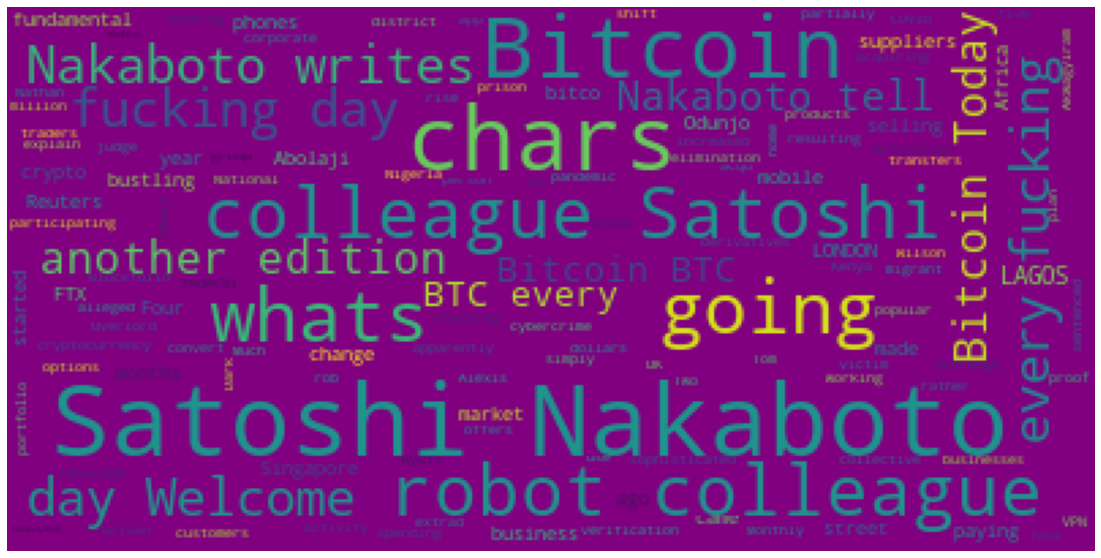

In [29]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
cloud_one = WordCloud(background_color='purple').generate(Bitcoin_df.Text.str.cat())
cloud_one
plt.axis("off")
plt.imshow(cloud_one)

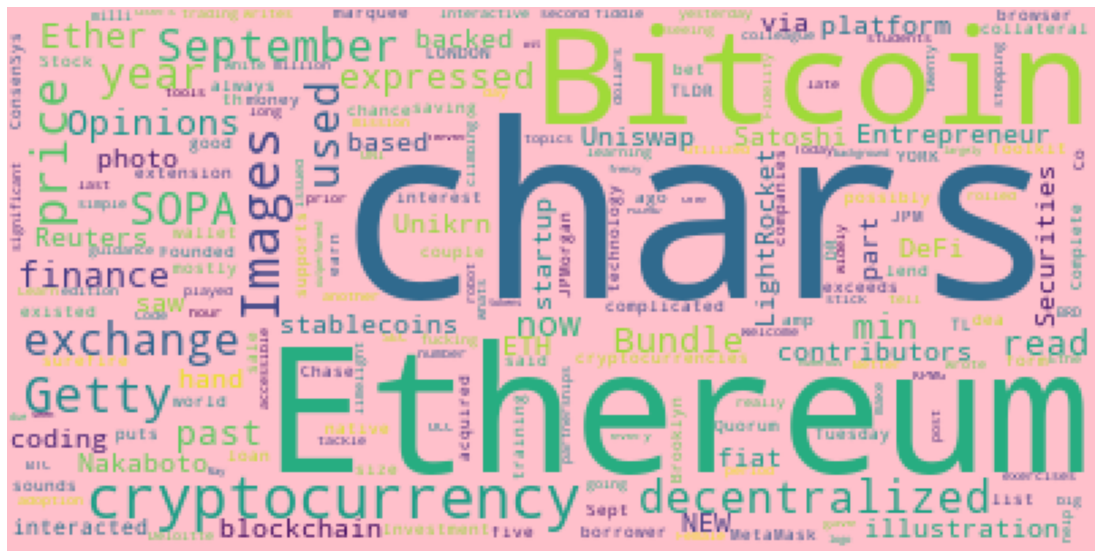

In [30]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
cloud_two = WordCloud(background_color='pink').generate(Ethereum_df.Text.str.cat())
cloud_two
plt.axis("off")
plt.imshow(cloud_two)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [31]:
import spacy
from spacy import displacy

In [32]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [35]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
bitcoin_ner = Bitcoin_df.Text.str.cat()
bitcoin_ner

'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]A US district judge has sentenced a UK National to five years in federal prison for participating in the cybercrime activities of hacking collective group “The Dark Overlord.” Nathan Wyatt was extrad… [+961 chars]By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars]“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling str

In [37]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_process = nlp(bitcoin_ner)
# Add a title to the document
# YOUR CODE HERE!
bitcoin_process.user_data["Title"] = "Bitcoin NER"

In [38]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_process, style='ent')

In [40]:
# List all Entities
# YOUR CODE HERE!
for i in bitcoin_process.ents:
    print(i.text, i.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
US GPE
UK National ORG
five years DATE
The Dark Overlord WORK_OF_ART
Nathan Wyatt PERSON
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
VPN PRODUCT
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockfolio GPE
FTX ORG
$150 million MONEY
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today

---

## Ethereum NER

In [44]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
ethereum_ner = Ethereum_df.Text.str.cat()
ethereum_ner

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars]September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars]LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars]NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain

In [45]:
N= 2
bigram_counts_E = Counter(ngrams(ethereum_p, N))
print(dict(bigram_counts_E))

{('youve', 'interacted'): 1, ('interacted', 'cryptocurrencies'): 1, ('cryptocurrencies', 'past'): 1, ('past', 'couple'): 1, ('couple', 'year'): 1, ('year', 'good'): 1, ('good', 'chance'): 1, ('chance', 'youve'): 1, ('youve', 'used'): 1, ('used', 'metamask'): 1, ('metamask', 'cryptocurrency'): 1, ('cryptocurrency', 'wallet'): 1, ('wallet', 'form'): 1, ('form', 'browser'): 1, ('browser', 'extension'): 1, ('extension', 'support'): 1, ('support', 'ether'): 1, ('ether', 'charstldr'): 1, ('charstldr', 'complete'): 1, ('complete', 'stock'): 1, ('stock', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'toolkit'): 1, ('toolkit', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'sept'): 1, ('sept', 'saving'): 1, ('saving', 'list'): 1, ('list', 'pricethe'): 1, ('pricethe', 'world'): 1, ('world', 'finance'): 1, ('finance', 'ha'): 1, ('ha', 'always'): 1, ('always', 'complicated'): 1, ('complicated', 'th'): 1, ('th', 'charsseptember'): 1, ('charsseptember', 'min'): 2, ('min', 

In [46]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
# Add a title to the document
# YOUR CODE HERE!
ethereum_process = nlp(eth_ner)
ethereum_process.user_data["Title"] = "Ethereum NER"

NameError: name 'eth_ner' is not defined

In [36]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_process, style = 'ent')

In [37]:
# List all Entities
# YOUR CODE HERE!
for i in ethereum_process.ents:
    print(i.text, i.label_)

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f